In [1]:
import pandas as pd

from benchmark._plot_util import *

In [2]:
df = pd.read_csv('../runtime1.csv')

In [3]:
# all columns that and with _post
post_columns = [
    "qtpu_post",
    "qtpu_gpu_post",
    "ckt_post",
]
cols = post_columns + ["base_qubits", "name"]


# df = df[post_columns + ["base_qubits"]]



In [8]:
def plot_bar(df, ax, x, y, yerr=None):
    df.plot.bar(
        x=x, y=y, rot=0, width=0.8, edgecolor="black", linewidth=2, ax=ax, legend=False, yerr=yerr
    )

    hatches = ["**", "//", "oo", "xx", "oo", "OO"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])

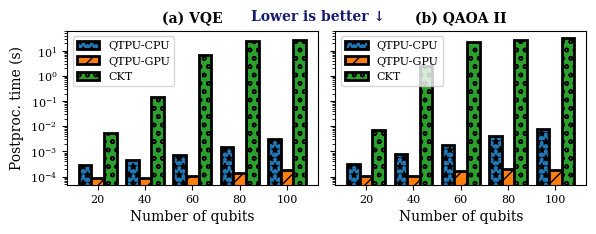

In [37]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6.7, 2), sharey=True)
fig.subplots_adjust(wspace=0.07)


df = df[df["base_qubits"] % 20 == 0]
df_vqe = df[df["name"] == "vqe"].groupby(["name", "base_qubits"]).mean().reset_index()
# df_vqe = df_vqe[df_vqe["base_qubits"] % 20 == 0]
df_qaoa = (
    df[df["name"] == "qaoa2"].groupby(["name", "base_qubits"]).mean().reset_index()
)

plot_bar(df_vqe, ax0, "base_qubits", post_columns)
plot_bar(df_qaoa, ax1, "base_qubits", post_columns)

for ax in [ax0, ax1]:
    ax.set_yscale("log")
    ax.legend(["QTPU-CPU", "QTPU-GPU", "CKT"])
    ax.set_xlabel("Number of qubits")
    ax.set_ylabel("Postproc. time (s)")

ax0.set_title("(a) VQE", fontweight="bold")
ax1.set_title("(b) QAOA II", fontweight="bold")

fig.text(0.5, .95, "Lower is better ↓", ha='center', va='center', fontweight="bold", color="midnightblue")
fig;

In [38]:
fig.savefig("runtime1.pdf", bbox_inches="tight")